#### Summary

The Department of Education Statistics releases a data set annually containing the percentage 
of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, 
with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made 
it available on his personal website.

Research questions are:<br>
Is there a gap between women and men in the STEM fields? The stem fields are 
'Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', and 'Math and Statistics'.<br>
Is there a gap between women and men in the non STEM fields?

The research questions are in the first steps answered with explorative data analysis using data visualizations. The visualizations are made by reducing the <a href="https://infovis-wiki.net/wiki/Data-Ink_Ratio"> Data-Ink Ratio. </a>

In the second step data analysis with pandas is done in particular using "groupby" to distinguish between
men and women. Data analysis pandas needs a data frame as basic structure. In the first step such a data frame is created including both women and men values. A variable "Gender" distinguishes then between "man" and "women." 


### Importing and checking the data set

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

In [7]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\gamarandor\\data_science\\data_science_projects\\data_camp_projects\\gendergap'

In [8]:
women_degrees = (pd.read_csv(filepath_or_buffer = 
                             "percent-bachelors-degrees-women-usa.csv",
                             sep=",", header=0))

Check first rows

In [9]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


Check dimensions

In [10]:
print(women_degrees.shape)

(42, 18)


42, observations or rows and 18 variables or columns

Check for data types 

In [11]:
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

Check for na, nan, null values

In [12]:
pd.isnull(women_degrees).sum()

Year                             0
Agriculture                      0
Architecture                     0
Art and Performance              0
Biology                          0
Business                         0
Communications and Journalism    0
Computer Science                 0
Education                        0
Engineering                      0
English                          0
Foreign Languages                0
Health Professions               0
Math and Statistics              0
Physical Sciences                0
Psychology                       0
Public Administration            0
Social Sciences and History      0
dtype: int64

### Explorative data analysis using data visualizations

Explore women degrees in Biology

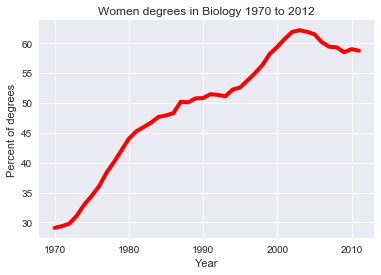

In [13]:

plt.plot(women_degrees["Year"], women_degrees["Biology"], color='r',linewidth=4.0)
plt.title("Women degrees in Biology 1970 to 2012")
plt.xlabel("Year")
plt.ylabel("Percent of degrees")
plt.show()

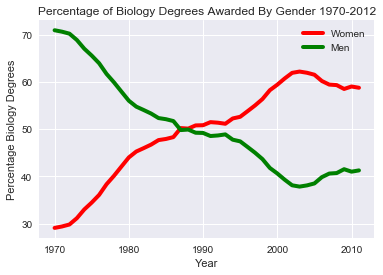

In [14]:

def plot_bio():
    plt.plot(women_degrees["Year"],  women_degrees["Biology"], color="red", linewidth=4,
         label="Women")
    plt.plot(women_degrees["Year"], 100 - women_degrees["Biology"], color="green", linewidth=4,  
         label="Men")
    plt.title("Percentage of Biology Degrees Awarded By Gender 1970-2012")
    plt.xlabel("Year")
    plt.ylabel("Percentage Biology Degrees")
    plt.legend(loc="upper right")
    
    plt.show()
    
plot_bio()

Increase data-ink ratio by erasing x-ticks and spines

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


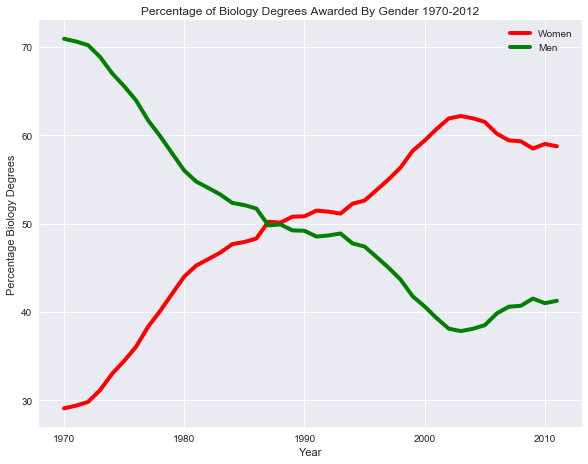

In [15]:
fig, ax = plt.subplots(figsize=(8,6 ))
fig.tight_layout(pad=0.3)
ax.plot(women_degrees["Year"],  women_degrees["Biology"], color="red", linewidth=4,
         label="Women")
ax.plot(women_degrees["Year"], 100 - women_degrees["Biology"], color="green", linewidth=4,  
         label="Men")
ax.set_title("Percentage of Biology Degrees Awarded By Gender 1970-2012")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage Biology Degrees")
ax.legend(loc="upper right")
ax.tick_params(bottom = "off", left="off", right="off", top="off")
remove_spines = ["right", "left", "bottom", "top"]
for spine in remove_spines:
    ax.spines[spine].set_visible(False)
plt.show()

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


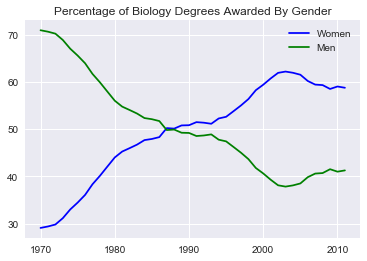

In [16]:
fig, ax = plt.subplots()
plt.plot(women_degrees["Year"], women_degrees["Biology"], color="blue",
         label="Women")
plt.plot(women_degrees["Year"], 100- women_degrees["Biology"], color="green", 
         label="Men")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc="upper right")
ax.tick_params(bottom = "off", left="off", right="off", top="off")
plt.show()

Women degrees increased and man degreees increased since 1970. 
In the eigthies women degrees overturned men degrees in Biology.

Explore women degrees in Psychology

In [17]:
years = women_degrees["Year"]
psy = women_degrees["Psychology"]
print(years.head())
print(psy.head())

0    1970
1    1971
2    1972
3    1973
4    1974
Name: Year, dtype: int64
0    44.4
1    46.2
2    47.6
3    50.4
4    52.6
Name: Psychology, dtype: float64


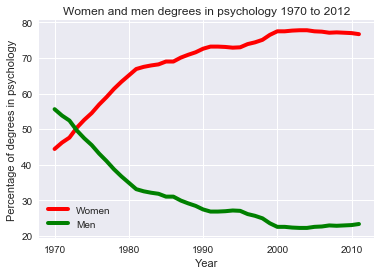

In [18]:
plt.plot(years, psy, color="red", linewidth=4, label="Women")
plt.plot(years, 100 - psy, color="green", linewidth=4, label="Men")
plt.title("Women and men degrees in psychology 1970 to 2012")
plt.xlabel("Year")
plt.ylabel("Percentage of degrees in psychology")
plt.legend(loc="lower left")
plt.show()

Since the earlier 1970 more women getting degrees in psychology then men. 
The gap increases ca. till 2000 and 

Increase data-ink ratio by erasing x-ticks and spines

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


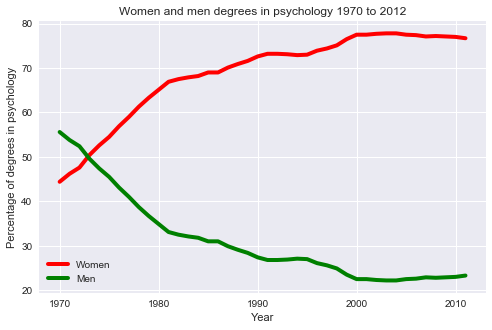

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(years, psy, color="red", linewidth=4, label="Women")
ax.plot(years, 100 - psy, color="green", linewidth=4, label="Men")
ax.set_title("Women and men degrees in psychology 1970 to 2012")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of degrees in psychology")
ax.legend(loc="lower left")
ax.tick_params(bottom = "off", left="off", right="off", top="off")

remove_spines = ["right", "left", "bottom", "top"]
for spine in remove_spines:
    ax.spines[spine].set_visible(False)
    
plt.show()

Explore women degrees in Engineering

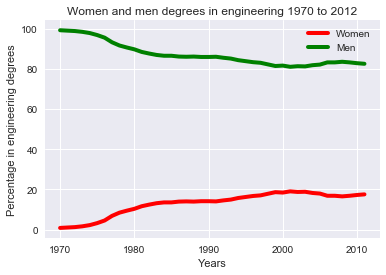

In [20]:
engineers = women_degrees["Engineering"]
plt.plot(years, engineers, linewidth=4, color="red", label="Women")
plt.plot(years, 100 - engineers, linewidth=4, color="green", label="Men")
plt.title("Women and men degrees in engineering 1970 to 2012")
plt.xlabel("Years")
plt.ylabel("Percentage in engineering degrees")
plt.legend(loc="best")
plt.show()

Increase data-ink ratio by erasing x-ticks

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


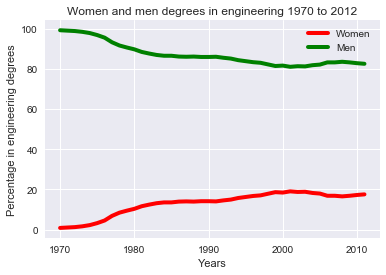

In [21]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(years, engineers, linewidth=4, color="red", label="Women")
ax.plot(years, 100 - engineers, linewidth=4, color="green", label="Men")
ax.set_title("Women and men degrees in engineering 1970 to 2012")
ax.set_xlabel("Years")
ax.set_ylabel("Percentage in engineering degrees")
ax.tick_params(bottom = "off", left="off", right="off", top="off")
ax.legend(loc="best")

remove_spines = ["right", "left", "bottom", "top"]
for spine in remove_spines:
    ax.spines[spine].set_visible(False)

plt.show()

Men degrees in engineering are constantly higher than by women, while the gap gets slightly closer.

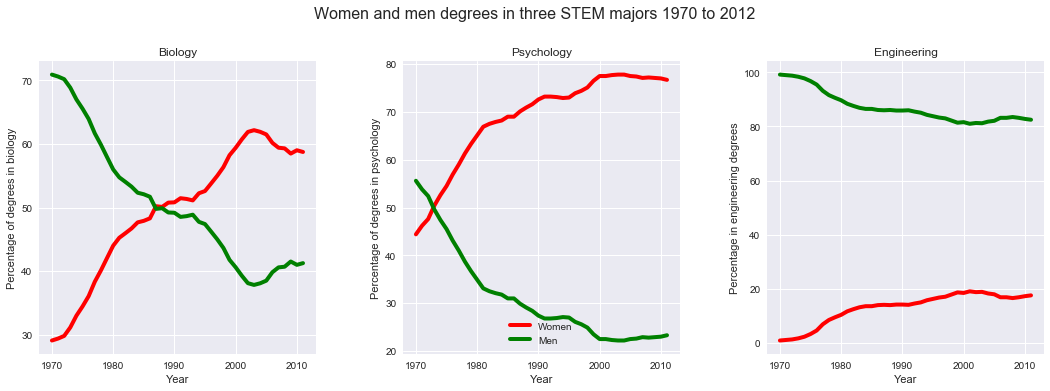

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
fig.suptitle("Women and men degrees in three STEM majors 1970 to 2012", fontsize=16)
fig.tight_layout(pad=6)

ax1.plot(women_degrees["Year"],  women_degrees["Biology"], color="red", linewidth=4,
         label="Women")
ax1.plot(women_degrees["Year"], 100 - women_degrees["Biology"], color="green", linewidth=4,
         label="Men")
ax1.set_title("Biology")
ax1.set_xlabel("Year")
ax1.set_ylabel("Percentage of degrees in biology")


ax2.plot(years, psy, color="red", linewidth=4, label="Women")
ax2.plot(years, 100 - psy, color="green", linewidth=4, label="Men")
ax2.set_title("Psychology")
ax2.set_xlabel("Year")
ax2.set_ylabel("Percentage of degrees in psychology")
ax2.legend(loc="lower center")

ax3.plot(years, engineers, linewidth=4, color="red", label="Women")
ax3.plot(years, 100 - engineers, linewidth=4, color="green", label="Men")
ax3.set_title("Engineering")
ax3.set_xlabel("Year")
ax3.set_ylabel("Percentage in engineering degrees")

plt.show()


Same using a for loop

Biology
Psychology
Engineering
[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228A9A6D5C0>, <matplotlib.axes._subplots.AxesSubplot object at 0x00000228A9718D68>, <matplotlib.axes._subplots.AxesSubplot object at 0x00000228A96ACBA8>]


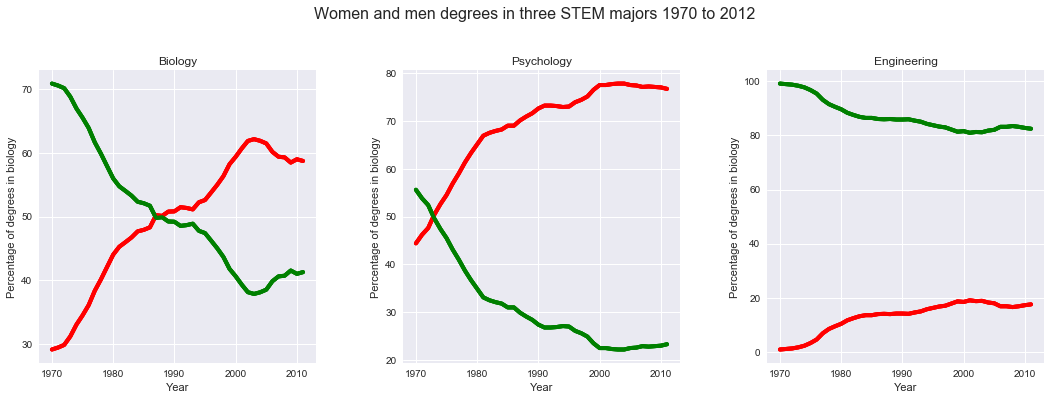

In [23]:
three_stems = ["Biology", "Psychology", "Engineering"]

for i in three_stems:
    print(i)

fig, axs = plt.subplots(1, 3, figsize=(16,6))

print(fig.axes)

fig.suptitle("Women and men degrees in three STEM majors 1970 to 2012", fontsize=16, y=1)
fig.tight_layout(pad=6)

for i in three_stems:
    for i,ax in enumerate(fig.axes):
        ax.plot(women_degrees["Year"],  women_degrees[three_stems[i]], color="red", linewidth=4,
         label="Women")
        ax.plot(women_degrees["Year"], 100 - women_degrees[three_stems[i]], color="green", linewidth=4,
         label="Men")
        ax.set_title(three_stems[i])
        ax.set_xlabel("Year")
        ax.set_ylabel("Percentage of degrees in biology")


plt.show()



In biology (since the mid eighties) and in psychology (since the early seventies) are more female majors but not in
engineering.

 Generate line charts for four STEM degree categories on a grid to encourage comparison

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


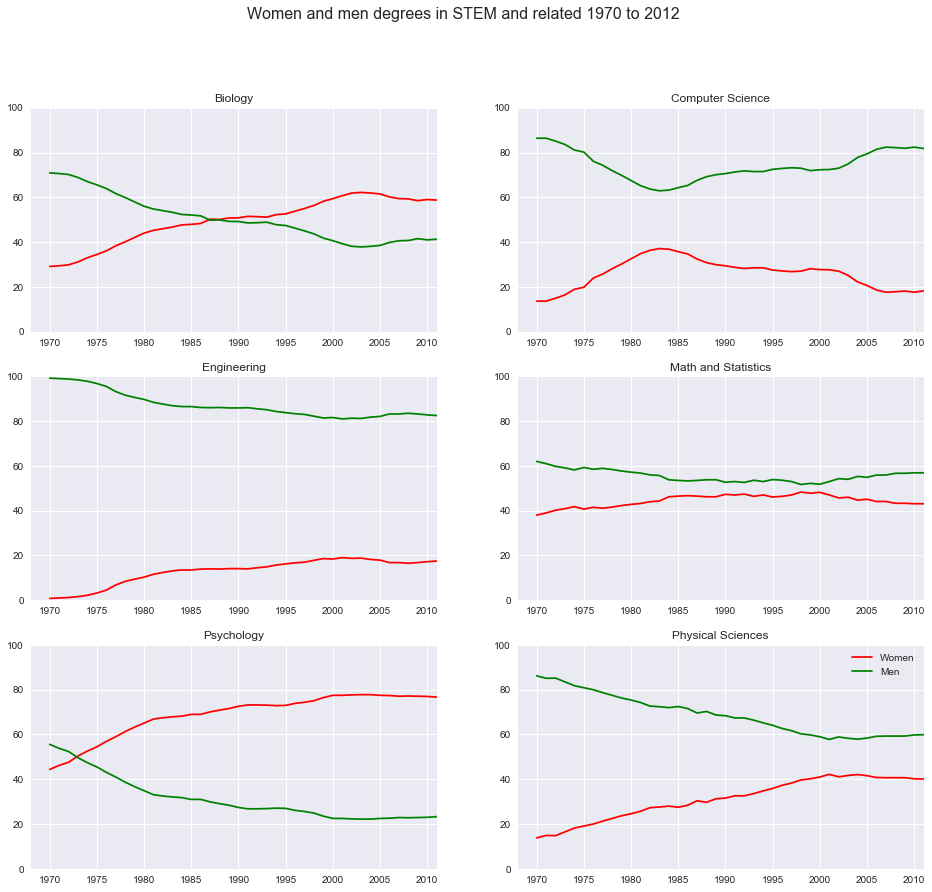

In [24]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics', 
              'Psychology', 'Physical Sciences' ]
major_cats[1]

fig_2 = plt.figure(figsize=(16, 14))
fig_2.suptitle("Women and men degrees in STEM and related 1970 to 2012", fontsize=16)
fig.subplots_adjust(hspace = .5, wspace=.001)
# fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

for i in range(0,6):
    ax_2 = fig_2.add_subplot(3,2,i+1)
    ax_2.plot(women_degrees["Year"], women_degrees[major_cats[i]], color="red", label="Women")
    ax_2.plot(women_degrees["Year"], 100-women_degrees[major_cats[i]], color="green", label="Men")
    ax_2.set_title(major_cats[i])
    ax_2.set_xlim(1968, 2011)
    ax_2.set_ylim(0,100)
    ax_2.tick_params(bottom = "off", left="off", right="off", top="off")
    ax_2.minorticks_off()
    plt.xticks(rotation=360)
    

    
plt.legend(loc="best")
plt.show()

Using RGB colours code and linewidth = 2 for line plotting

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


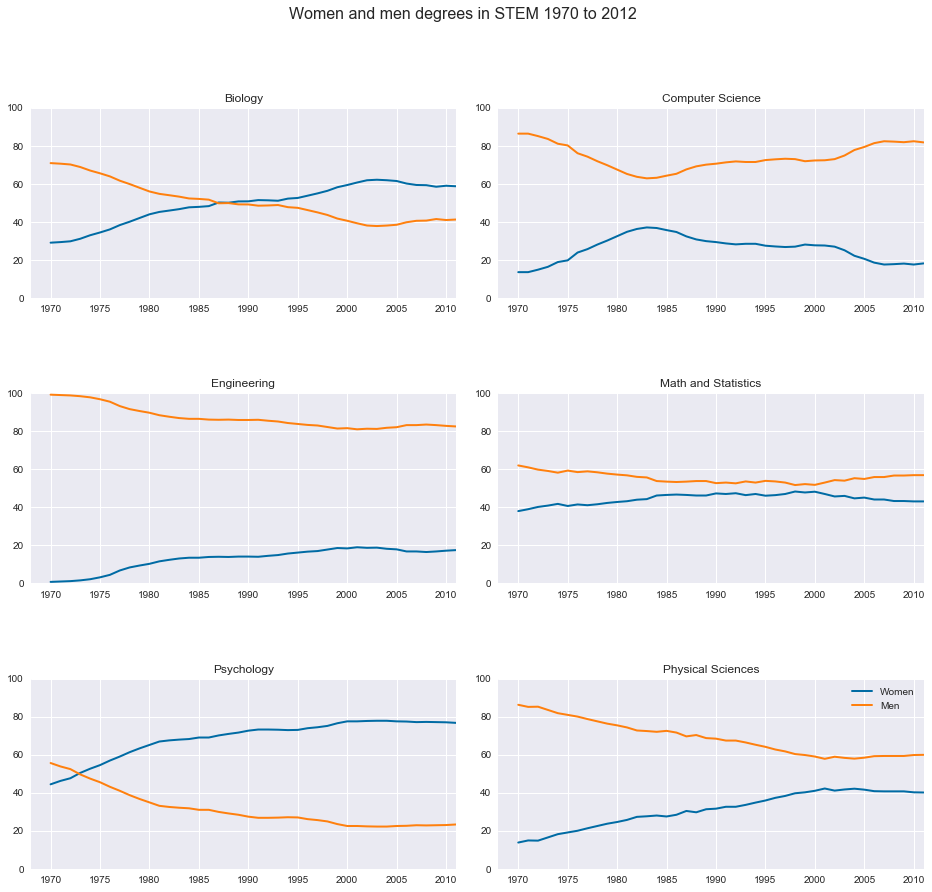

In [25]:
cb_dark_blue = (0/255,107/255,164/255)
orange = (255/255, 128/255, 14/255)

fig_3 = plt.figure(figsize=(16, 14))
fig_3.suptitle("Women and men degrees in STEM 1970 to 2012", fontsize=16)
fig_3.subplots_adjust(hspace = .5, wspace=.1)
fig.tight_layout(pad=6)

for i in range(0,6):
    ax_2 = fig_3.add_subplot(3,2,i+1)
    ax_2.plot(women_degrees["Year"], women_degrees[major_cats[i]], color=cb_dark_blue, label="Women",
              linewidth=2)
    ax_2.plot(women_degrees["Year"], 100-women_degrees[major_cats[i]], color=orange, label="Men",
              linewidth=2)
    ax_2.set_title(major_cats[i])
    ax_2.set_xlim(1968, 2011)
    ax_2.set_ylim(0,100)
    ax_2.tick_params(bottom = "off", left="off", right="off", top="off")
    ax_2.minorticks_off()
    plt.xticks(rotation=360)
    
plt.legend(loc="best")
plt.show()

Reduce Data-Ink Ratio ratio for quicker understanding

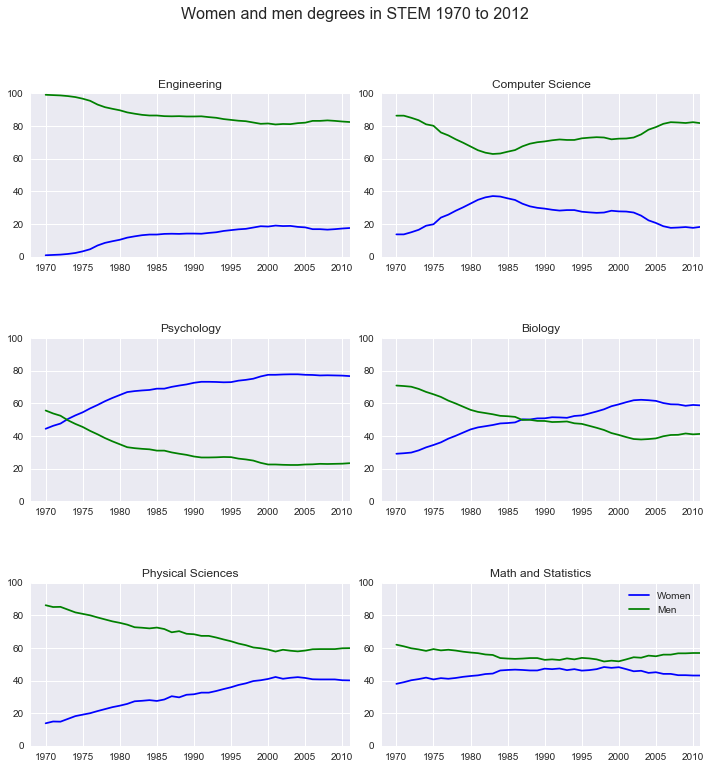

In [26]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']


fig_4 = plt.figure(figsize=(12, 12))
fig_4.subplots_adjust(hspace = .5, wspace=.1)
fig_4.suptitle("Women and men degrees in STEM 1970 to 2012", fontsize=16)

for sp in range(0,6):
    ax = fig_4.add_subplot(3,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
plt.legend(loc="best")
plt.show()

Display all STEM disciplines on one axis allowing for better comparison

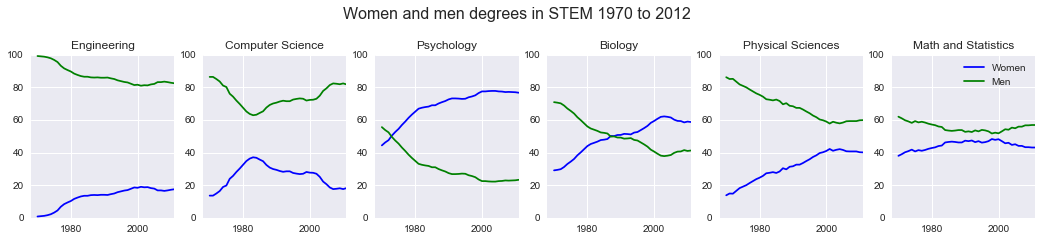

In [27]:
# Using fig and not axes method
fig_5 = plt.figure(figsize=(18, 3))
fig_5.suptitle("Women and men degrees in STEM 1970 to 2012", fontsize=16, y=1.1)

for sp in range(0,6):
    ax = fig_5.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
plt.legend(loc="best")
plt.show()

Replacing the legend with ax-annotation further reducing non-data ink and the Data-Ink Ratio

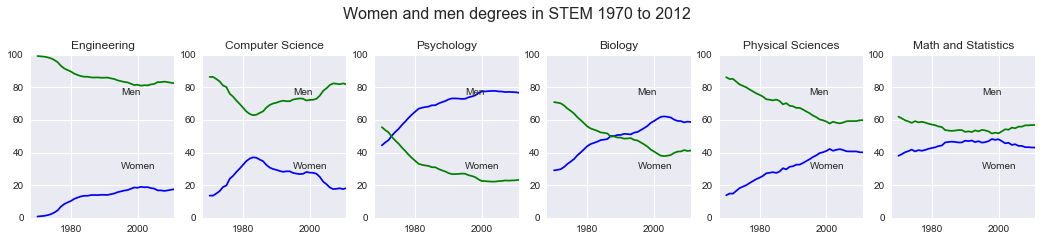

In [28]:
# Using fig and not axes method
fig_5 = plt.figure(figsize=(18, 3))
fig_5.suptitle("Women and men degrees in STEM 1970 to 2012", fontsize=16, y=1.1)

for sp in range(0,6):
    ax = fig_5.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.text(x=1995, y=75, s="Men")
    ax.text(x=1995, y=30, s="Women")
plt.show()

Using RGB coding to change line colors

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


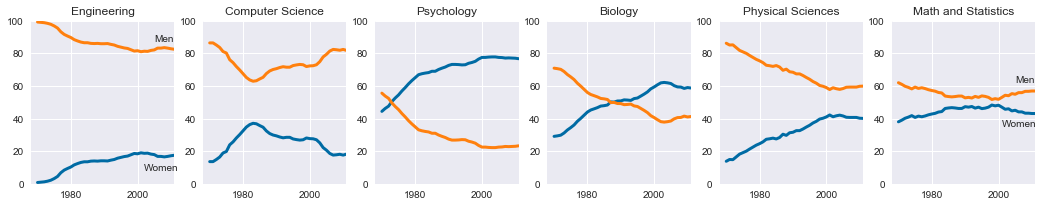

In [29]:

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

Gap between women and men in non STEM disciplines

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


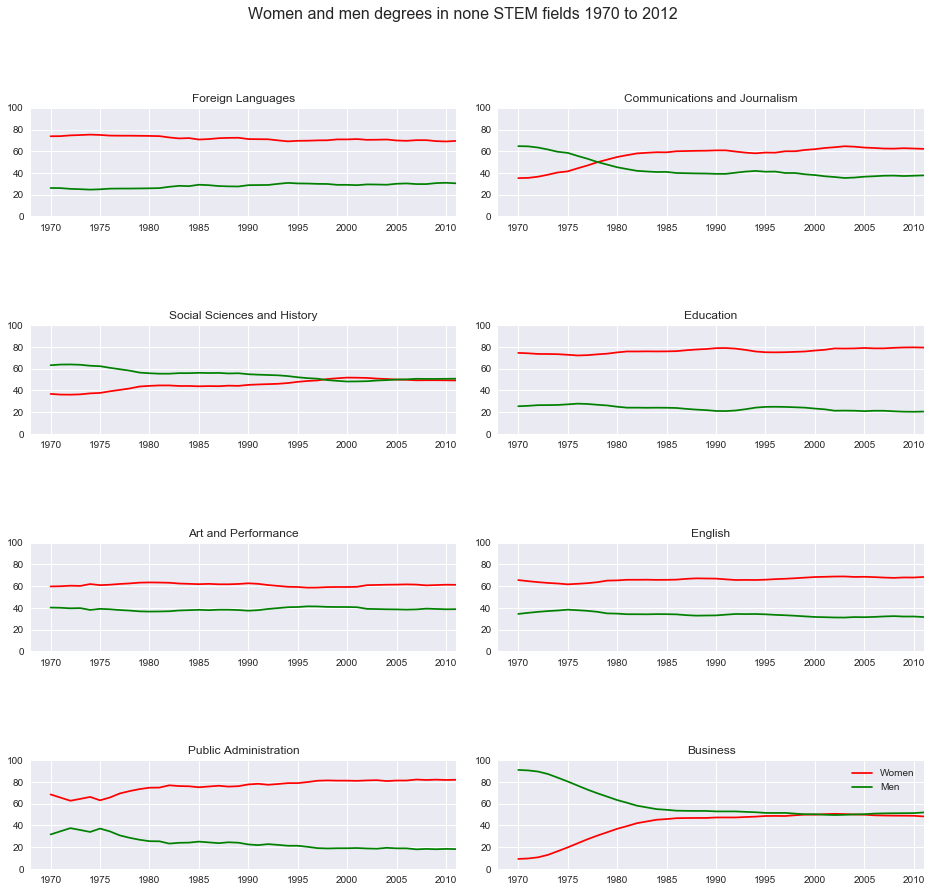

In [30]:
major_cats_2 = ['Foreign Languages', 'Communications and Journalism','Social Sciences and History', 
              'Education', 'Art and Performance' , 'English', 'Public Administration', 'Business'  ]

fig_3 = plt.figure(figsize=(16, 14))
fig_3.suptitle("Women and men degrees in none STEM fields 1970 to 2012", fontsize=16)
fig_3.subplots_adjust(hspace = 1, wspace=.1)
# fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

for i in range(0,8):
    ax_2 = fig_3.add_subplot(4,2,i+1)
    ax_2.plot(women_degrees["Year"], women_degrees[major_cats_2[i]], color="red", label="Women")
    ax_2.plot(women_degrees["Year"], 100-women_degrees[major_cats_2[i]], color="green", label="Men")
    ax_2.set_title(major_cats_2[i])
    ax_2.set_xlim(1968, 2011)
    ax_2.set_ylim(0,100)
    ax_2.tick_params(bottom = "off", left="off", right="off", top="off")
    ax_2.minorticks_off()
    plt.xticks(rotation=360)
    

    
plt.legend(loc="best")
plt.show()


Display non STEM disciplines on one axis allowing for better comparison

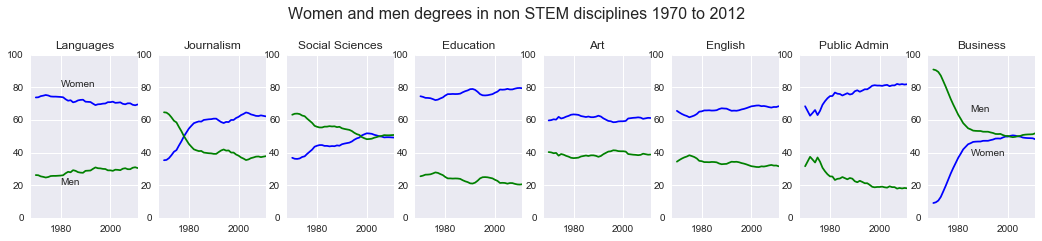

In [31]:
major_cats_3 = ['Languages', 'Journalism','Social Sciences', 
                'Education', 'Art' , 'English', 'Public Admin', 'Business'  ]

fig_7 = plt.figure(figsize=(18, 3))
fig_7.suptitle("Women and men degrees in non STEM disciplines 1970 to 2012", fontsize=16, y=1.1)


for i in range(0,8):
    ax = fig_7.add_subplot(1,8,i+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats_2[i]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats_2[i]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats_3[i])
    # Using an if / elif statement to place text annotations in the first and last graphic
    if i == 0:
        ax.text(x=1980, y=80, s="Women")
        ax.text(x=1980, y=20, s="Men")
    elif i == 7:
        ax.text(x=1985, y=65, s="Men")
        ax.text(x=1985, y=38, s="Women")


plt.show()

It most disciplines women have higher degree of majors. Education, art, English and public administtration 
were always disciplines with a women majority. Only in business are slightly more male majors after 2000. 
Till the eighties wommen overturned men in journalism.

Would it make sense to write a function?

<class 'list'>
17


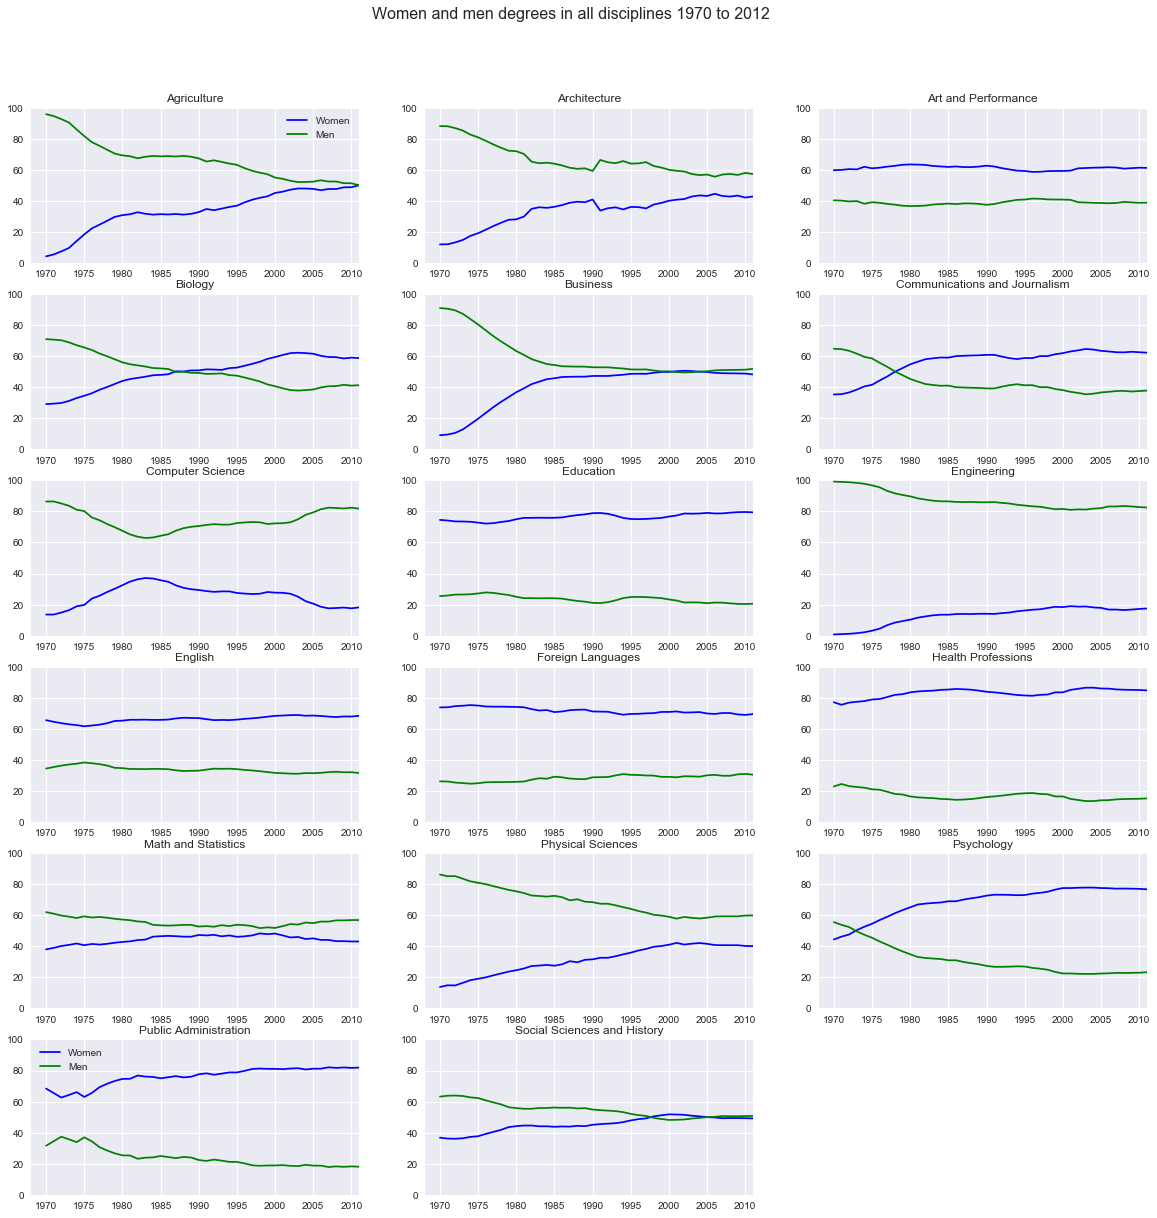

In [32]:
all_variables = women_degrees.columns.values.tolist()
all_degrees = all_variables[1:18] 
print(type(all_degrees))
print(len(all_degrees))

fig_11 = plt.figure(figsize=(20, 20))
fig_11.suptitle("Women and men degrees in all disciplines 1970 to 2012", fontsize=16, y=0.95)


for i in range(0,17):
    ax = fig_11.add_subplot(6,3,i+1)
    ax.plot(women_degrees['Year'], women_degrees[all_degrees[i]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[all_degrees[i]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(all_degrees[i])
    if i == 0:
        ax.legend(loc="best")
    elif i == 15:
        ax.legend(loc="best")
   

plt.show()

Comparing women and men across all degree categories.<br>
The categories are STEM, liberal arts, and other.

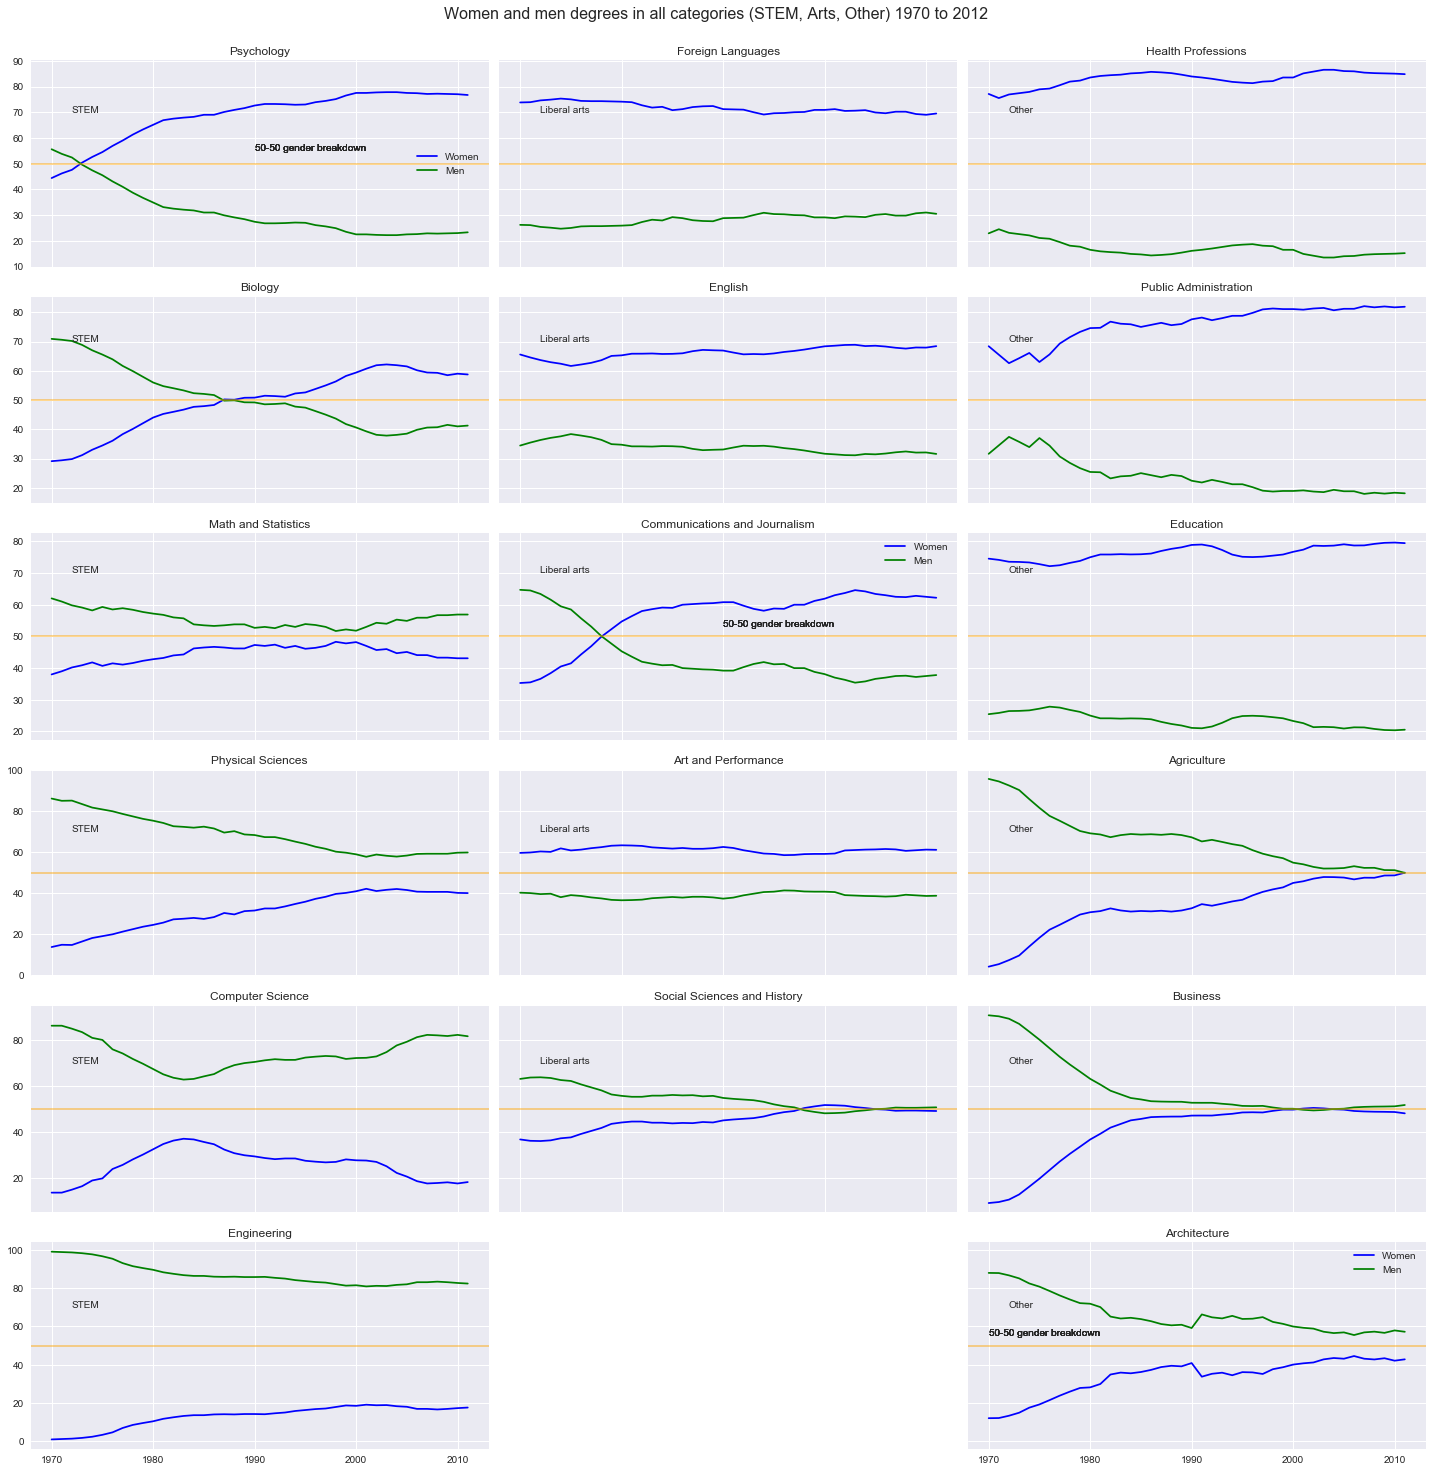

In [33]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig_100, ax_100 = plt.subplots(6, 3, sharex='col', sharey='row', figsize=(20, 20))
fig_100.subplots_adjust(hspace=0.4, wspace=0.4)
fig_100.suptitle("Women and men degrees in all categories (STEM, Arts, Other) 1970 to 2012", fontsize=16, y=1.02)

for i in range(0,6):
    for j in range(0,1):   
        
            ax_100[i, j].plot(women_degrees['Year'], women_degrees[stem_cats[i]], c='blue', label='Women')
            ax_100[i, j].plot(women_degrees['Year'], 100-women_degrees[stem_cats[i]], c='green', label='Men')
            ax_100[i, j].set_title(stem_cats[i])
            ax_100[i, j].annotate("STEM", xy=(1972,70))
            ax_100[0, 0].legend(loc="center right")
            ax_100[i, j].axhline(50, color="orange", alpha=0.5)
            ax_100[0, 0].annotate("50-50 gender breakdown", xy=(1990,55))
            
          
                        
for i in range(0,5):
    for j in range(1,2):   
        
            ax_100[i, j].plot(women_degrees['Year'], women_degrees[lib_arts_cats[i]], c='blue', label='Women')
            ax_100[i, j].plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[i]], c='green', label='Men')            
            ax_100[i, j].set_title(lib_arts_cats[i])  
            ax_100[i, j].annotate("Liberal arts", xy=(1972,70))
            ax_100[2, 1].annotate("50-50 gender breakdown", xy=(1990,53))
            ax_100[i, j].axhline(50, color="orange", alpha=0.5)
            ax_100[5, 1].axis('off')
            if i == 2:
                ax_100[2, 1].legend(loc="upper right")
          
            

                       
for i in range(0,6):
    for j in range(2,3):   
        
            ax_100[i, j].plot(women_degrees['Year'], women_degrees[other_cats[i]], c='blue', label='Women')
            ax_100[i, j].plot(women_degrees['Year'], 100-women_degrees[other_cats[i]], c='green', label='Men')
            ax_100[i, j].set_title(other_cats[i])
            ax_100[i, j].annotate("Other", xy=(1972,70))
            ax_100[5, 2].annotate("50-50 gender breakdown", xy=(1970,55))
            ax_100[i, j].axhline(50, color="orange", alpha=0.5)
            if i == 5:
                ax_100[5, 2].legend(loc="upper right") 
                      
plt.tight_layout()      
plt.savefig("gender_degrees.png", dpi=1200, format='png',)
plt.show()


### Data analysis with pandas
<p>
Data analysis pandas needs a data frame as basic structure.
In the first step such a data frame is created including both women and men values.
A variable "Gender" distinguishes then between "man" and "women."
</p>
<p>
Create a pandas dataframe with percentage of man degrees for every discipline.
</p>

In [34]:
# Populate key-value pairs of a dictionary with male percentages as items
# and disciplines as keys
dict_man_degrees = dict()

for i in all_variables:
    if i in dict_man_degrees:
        dict_man_degrees[i] = dict_man_degrees[i] + 1
    else:
        dict_man_degrees[i] = 100 - women_degrees[i]

# Check the keys
print(dict_man_degrees.keys())


dict_keys(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology', 'Business', 'Communications and Journalism', 'Computer Science', 'Education', 'Engineering', 'English', 'Foreign Languages', 'Health Professions', 'Math and Statistics', 'Physical Sciences', 'Psychology', 'Public Administration', 'Social Sciences and History'])


In [35]:
# df to dict
df_man_degrees = pd.DataFrame.from_dict(dict_man_degrees)
# Correct Year column
df_man_degrees["Year"] = (df_man_degrees["Year"] - 100).abs()
print(df_man_degrees["Year"].head())
df_man_degrees["Gender"] = "man"
print(df_man_degrees.columns)
print(df_man_degrees.head().iloc[0:5,0:3])
print(df_man_degrees["Gender"].head())

df_women_degrees = women_degrees
df_women_degrees["Gender"] = "women"
print(df_women_degrees.columns)
print(df_women_degrees["Gender"].head())

0    1970
1    1971
2    1972
3    1973
4    1974
Name: Year, dtype: int64
Index(['Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History',
       'Year', 'Gender'],
      dtype='object')
   Agriculture  Architecture  Art and Performance
0    95.770202     88.078995                 40.3
1    94.547203     87.996894                 40.1
2    92.579290     86.785406                 39.6
3    90.346398     85.208387                 39.8
4    85.925377     82.555312                 38.1
0    man
1    man
2    man
3    man
4    man
Name: Gender, dtype: object
Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer S

Append the dataframe women degrees and men degrees creating one data frame 
containing both

In [36]:
df_wo_men = df_women_degrees.append(df_man_degrees)
print(df_wo_men.head()[["Year", "Agriculture", "Biology", "Gender"]])
print(df_wo_men.tail()[["Year", "Agriculture", "Biology", "Gender"]])
print(type(df_wo_men))

   Year  Agriculture    Biology Gender
0  1970     4.229798  29.088363  women
1  1971     5.452797  29.394403  women
2  1972     7.420710  29.810221  women
3  1973     9.653602  31.147915  women
4  1974    14.074623  32.996183  women
    Year  Agriculture    Biology Gender
37  2007    52.394974  40.588007    man
38  2008    52.429166  40.694235    man
39  2009    51.332776  41.510417    man
40  2010    51.269958  40.989745    man
41  2011    49.962818  41.257603    man
<class 'pandas.core.frame.DataFrame'>


Calculate mean over all years for every discipline and transpose it.

In [37]:
# Subset all degrees
# print(df_wo_men.columns.values)
# print(len(df_wo_men.columns.values))
# df_wo_men_none_year = df_wo_men.columns.values[0:18]
# print(df_wo_men_none_year)

df_wo_men_none_year_mean = df_wo_men.groupby("Gender")[stem_cats ].mean()
df_wo_men_none_year_mean_transpose = df_wo_men_none_year_mean.transpose()
print(df_wo_men_none_year_mean)
# print(df_wo_men_mean.info())

        Psychology    Biology  Math and Statistics  Physical Sciences  \
Gender                                                                  
man       31.22381  50.570136            55.521429          68.695238   
women     68.77619  49.429864            44.478571          31.304762   

        Computer Science  Engineering  
Gender                                 
man            74.190476    87.107143  
women          25.809524    12.892857  


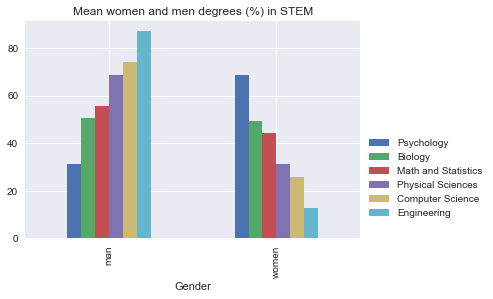

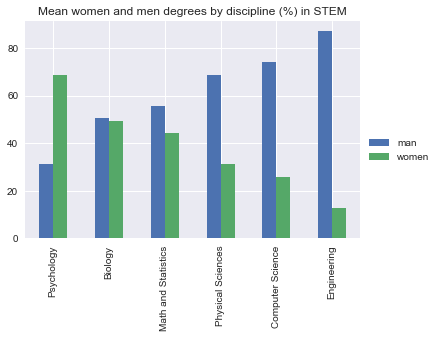

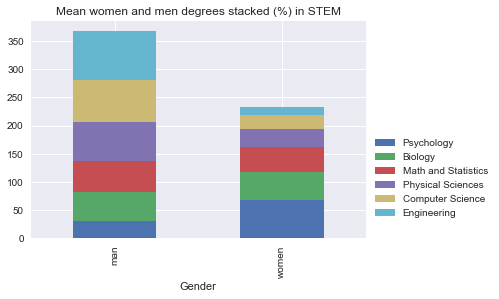

In [38]:
df_wo_men_none_year_mean.plot.bar()
plt.title("Mean women and men degrees (%) in STEM")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()

df_wo_men_none_year_mean_transpose.plot.bar()
plt.title("Mean women and men degrees by discipline (%) in STEM")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()

df_wo_men_none_year_mean.plot.bar(stacked=True)
plt.title("Mean women and men degrees stacked (%) in STEM")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Calculate median over all years for every discipline and transpose it.

        Psychology    Biology  Math and Statistics  Physical Sciences  \
Gender                                                                  
man          27.25  49.028531                 55.1               67.9   
women        72.75  50.971469                 44.9               32.1   

        Computer Science  Engineering  
Gender                                 
man                 72.7         85.9  
women               27.3         14.1  


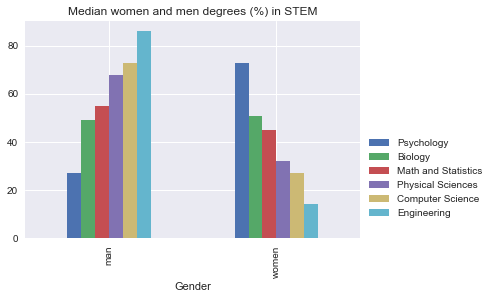

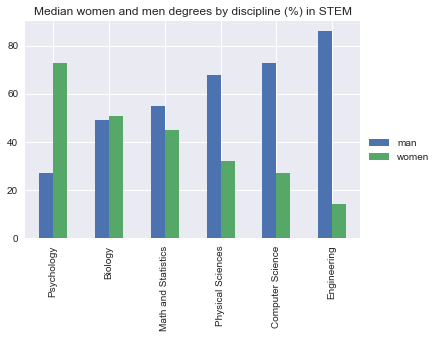

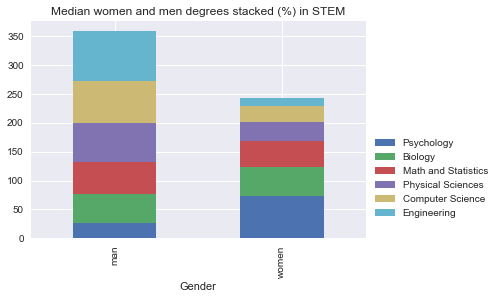

In [39]:
df_wo_men_none_year_median = df_wo_men.groupby("Gender")[stem_cats ].median()
print(df_wo_men_none_year_median)

df_wo_men_none_year_median_transpose = df_wo_men_none_year_median.transpose()

df_wo_men_none_year_median.plot.bar()
plt.title("Median women and men degrees (%) in STEM")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()

df_wo_men_none_year_median_transpose.plot.bar()
plt.title("Median women and men degrees by discipline (%) in STEM")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()

df_wo_men_none_year_median.plot.bar( stacked=True)
plt.title("Median women and men degrees stacked (%) in STEM")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()



In [40]:
print(df_wo_men_none_year_median.loc[["man", "women"], :])

        Psychology    Biology  Math and Statistics  Physical Sciences  \
Gender                                                                  
man          27.25  49.028531                 55.1               67.9   
women        72.75  50.971469                 44.9               32.1   

        Computer Science  Engineering  
Gender                                 
man                 72.7         85.9  
women               27.3         14.1  


Making an overview plot of mean and median plots.

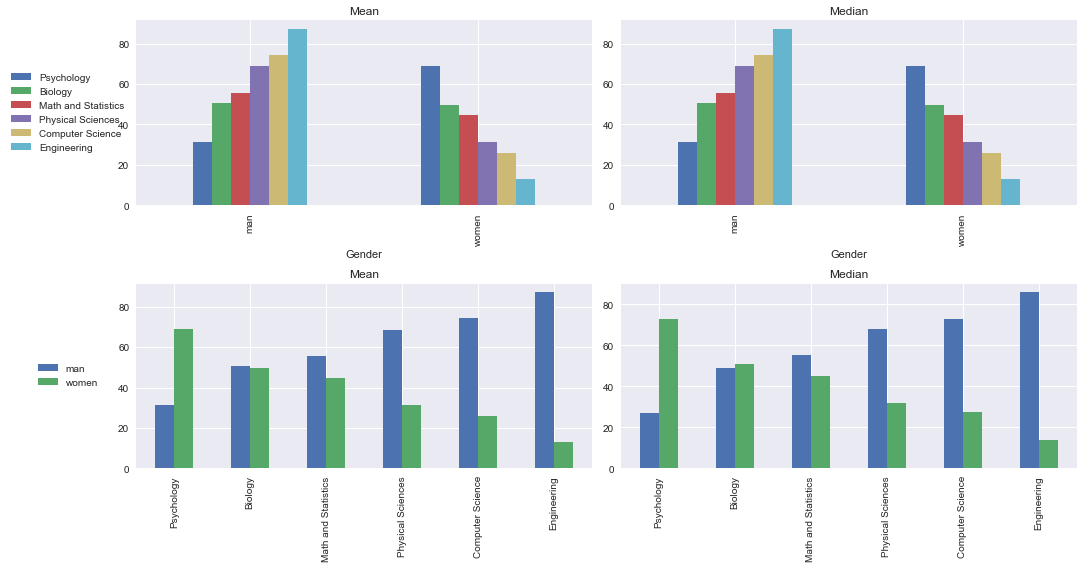

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
axes


df_wo_men_none_year_mean.plot.bar(ax=axes[0,0], legend = False)
df_wo_men_none_year_mean.plot.bar(ax=axes[0,1], legend = False)

axes[0,0].set_title("Mean")
axes[0,0].legend(loc='center', bbox_to_anchor=(-0.15, 0.5))
axes[0,1].set_title("Median")


df_wo_men_none_year_mean_transpose.plot.bar(ax=axes[1,0], legend = False)
df_wo_men_none_year_median_transpose.plot.bar(ax=axes[1,1], legend = False)
axes[1,0].set_title("Mean")
axes[1,0].legend(loc='center', bbox_to_anchor=(-0.15, 0.5))
axes[1,1].set_title("Median")

plt.tight_layout()
plt.show()


Both median and mean values support a higher percentage of degrees by men aside from biology and psychology 
over all years ranging 1970 to 2012. This of course does not reflect the situation for the last years. 
Getting a clearer picture for the range 2005 to 2012 would need a simple subset over years.

In [42]:
df_wo_men.groupby(["Gender"])[stem_cats ].mean()


,Psychology,Biology,Math and Statistics,Physical Sciences,Computer Science,Engineering
Gender,,,,,,
man,31.22381,50.570136,55.521429,68.695238,74.190476,87.107143
women,68.77619,49.429864,44.478571,31.304762,25.809524,12.892857


In [43]:
df_wo_men.groupby(["Gender"])[stem_cats ].std()

,Psychology,Biology,Math and Statistics,Physical Sciences,Computer Science,Engineering
Gender,,,,,,
man,9.705463,10.087725,2.646262,9.000866,6.688753,5.670824
women,9.705463,10.087725,2.646262,9.000866,6.688753,5.670824


In [44]:
df_wo_men.groupby(["Gender"])[stem_cats ].max()

,Psychology,Biology,Math and Statistics,Physical Sciences,Computer Science,Engineering
Gender,,,,,,
man,55.6,70.911637,62.0,86.2,86.4,99.2
women,77.8,62.169456,48.3,42.2,37.1,19.0


Computing statistics with aggregate by gender over the whole time range

In [45]:
df_wo_men_agg = (df_wo_men.groupby(["Gender"])[stem_cats ]
                 .agg(['mean', 'median', 'min', 'max', 'std']).round(2).transpose().sort_index())

df_wo_men_agg

Gender                        man  women
Biology             max     70.91  62.17
                    mean    50.57  49.43
                    median  49.03  50.97
                    min     37.83  29.09
                    std     10.09  10.09
Computer Science    max     86.40  37.10
                    mean    74.19  25.81
                    median  72.70  27.30
                    min     62.90  13.60
                    std      6.69   6.69
Engineering         max     99.20  19.00
                    mean    87.11  12.89
                    median  85.90  14.10
                    min     81.00   0.80
                    std      5.67   5.67
Math and Statistics max     62.00  48.30
                    mean    55.52  44.48
                    median  55.10  44.90
                    min     51.70  38.00
                    std      2.65   2.65
Physical Sciences   max     86.20  42.20
                    mean    68.70  31.30
                    median  67.90  32.10
                    min     57.80  13.80
                    std      9.00   9.00
Psychology          max     55.60  77.80
                    mean    31.22  68.78
                    median  27.25  72.75
                    min     22.20  44.40
                    std      9.71   9.71

On average man majored in engineering 87.11 % over the time range. The minimum was 81 % and the max 99.20.
In contrast women majored in psychology 68.78 % over the time range.The minimum was 44.40 % and the maximum 77.80%.

Exploring the multiindex

In [46]:
print(type(df_wo_men_agg))
print(df_wo_men_agg.index)

# Indexing (individual row)
df_wo_men_agg.loc[('Biology', 'max')]
# Indexing (individual row column)
df_wo_men_agg.loc[('Biology', 'max'), 'man']
# Slicing (outermost index)
df_wo_men_agg.loc['Biology']
# Slicing (outermost index)
print(df_wo_men_agg.loc['Biology': 'Engineering'])
# Fancy indexing (outermost index)
print(df_wo_men_agg.loc[(['Biology', 'Engineering'], 'mean'), :])

<class 'pandas.core.frame.DataFrame'>
MultiIndex(levels=[['Biology', 'Computer Science', 'Engineering', 'Math and Statistics', 'Physical Sciences', 'Psychology'], ['max', 'mean', 'median', 'min', 'std']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])
Gender                     man  women
Biology          max     70.91  62.17
                 mean    50.57  49.43
                 median  49.03  50.97
                 min     37.83  29.09
                 std     10.09  10.09
Computer Science max     86.40  37.10
                 mean    74.19  25.81
                 median  72.70  27.30
                 min     62.90  13.60
                 std      6.69   6.69
Engineering      max     99.20  19.00
                 mean    87.11  12.89
                 median  85.90  14.10
                 min     81.00   0.80
                 std 

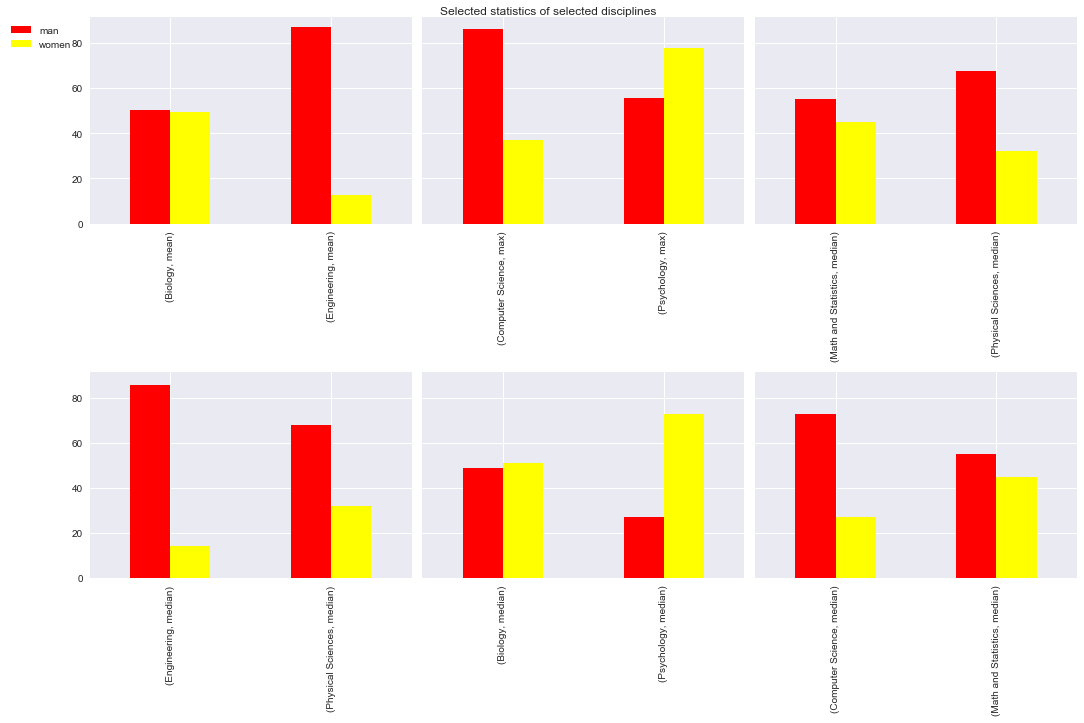

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(15,10) )
plt.suptitle("Selected statistics of selected disciplines", y=1)
df_wo_men_agg.loc[(['Biology', 'Engineering'], 'mean'), :].plot.bar(ax=axes[0,0], legend=False, 
                                                                    color=['red', 'yellow'])
df_wo_men_agg.loc[(['Psychology', 'Computer Science'], 'max'), :].plot.bar(ax=axes[0,1], legend=False,
                                                                           color=['red', 'yellow'])
df_wo_men_agg.loc[(['Physical Sciences', 'Math and Statistics'], 'median'), :].plot.bar(ax=axes[0,2], legend=False,
                                                                                       color=['red', 'yellow'])

df_wo_men_agg.loc[(['Physical Sciences', 'Engineering'], 'median'), :].plot.bar(ax=axes[1,0], legend=False,
                                                                                color=['red', 'yellow'])
df_wo_men_agg.loc[(['Biology', 'Psychology'], 'median'), :].plot.bar(ax=axes[1,1], legend=False,
                                                                     color=['red', 'yellow'])
df_wo_men_agg.loc[(['Computer Science', 'Math and Statistics'], 'median'), :].plot.bar(ax=axes[1,2], legend=False,
                                                                                       color=['red', 'yellow'])


axes[0,0].legend(loc='upper center', bbox_to_anchor=(-0.15, 1))


plt.tight_layout()
plt.show()